In [34]:
import pandas as pd
import numpy as np

In [35]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class']
df = pd.read_csv(url, names=names)
classname = df['class']
dataset=df.dropna()

In [36]:
list1=[]
list2=[]
list3=[]
list4=[]
column1=sum(dataset.sepallength)/len(dataset.sepallength)
column2=sum(dataset.sepalwidth)/len(dataset.sepalwidth)
column3=sum(dataset.petallength)/len(dataset.petallength)
column4=sum(dataset.petalwidth)/len(dataset.petalwidth)
for x in range(150):
    list1.append(dataset.sepallength[x]-column1)
    list2.append(dataset.sepalwidth[x]-column2)
    list3.append(dataset.petallength[x]-column3)
    list4.append(dataset.petalwidth[x]-column4)

In [37]:
x=np.column_stack((list1,list2,list3,list4))
xT=x.transpose()

In [38]:
covariancematrix = np.matmul(xT,x)/(x.shape[0]-1)

In [39]:
from numpy import linalg as LA
e,v = LA.eig(covariancematrix)

In [40]:
evlist=[]
sortedevziplist=[]
evzip=list(zip(e,v))
print(evzip)
sortedevzip = sorted(evzip, reverse = True)
sortedevzip
for i in range(4):
    sortedevziplist.append([sortedevzip[i][1][0],sortedevzip[i][1][1]])

[(4.2248407683201075, array([ 0.36158968, -0.65653988, -0.58099728,  0.31725455])), (0.24224357162751523, array([-0.08226889, -0.72971237,  0.59641809, -0.32409435])), (0.078523908094154576, array([ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899])), (0.023683027126001021, array([ 0.35884393,  0.07470647,  0.54906091,  0.75112056]))]


In [41]:
sortedevziplistmatrix=np.array(sortedevziplist)

In [42]:
z=np.matmul(x,sortedevziplistmatrix)

In [46]:
d = {'Component 1': z[:,0], 'Component 2': z[:,1],'col3' : classname}
dfs = pd.DataFrame(data=d)

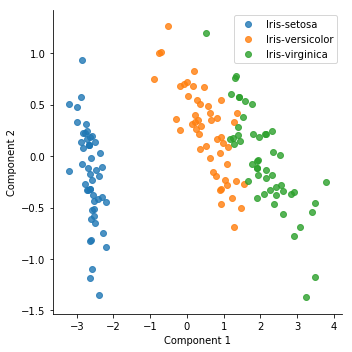

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot(x="Component 1",y="Component 2",data = dfs,fit_reg=False,hue='col3',legend=False)
plt.legend(loc="upper right")
plt.show()